## Programa de animaciones


En este notebook se harán todas las animaciones precisas.


In [ ]:
### PROGRAMA PARA VIDEO GUARDAR DE ENERGIA Y PENDULO


## Pon las condiniciones iniciales y energía

theta=1.7
phi=0.8
E=50.0

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Cargar datos de posiciones y energía
data = np.loadtxt('c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4_intento2/posiciones.txt')
hamiltoniano = np.loadtxt('c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4_intento2/hamiltoniano.txt')

x0, y0 = 3, 3
x1, y1 = data[:, 0], data[:, 1]
x2, y2 = data[:, 2], data[:, 3]

frames = min(len(data), len(hamiltoniano))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Subgráfica del péndulo
ax1.set_xlim(0, 6)
ax1.set_ylim(0, 6)
ax1.set_aspect('equal')
ax1.set_title('Péndulo doble')
line1, = ax1.plot([], [], 'o-', lw=2, color='b')
line2, = ax1.plot([], [], 'o-', lw=2, color='r')

# Subgráfica de la energía
ax2.set_xlim(0, frames)
ax2.set_ylim(np.min(hamiltoniano), np.max(hamiltoniano))
ax2.set_title('Energía (Hamiltoniano)')
ax2.set_xlabel('Paso temporal')
ax2.set_ylabel('Energía')
energy_line, = ax2.plot([], [], color='g')

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    energy_line.set_data([], [])
    return line1, line2, energy_line

def update(frame):
    # Animación del péndulo
    line1.set_data([x0, x1[frame]], [y0, y1[frame]])
    line2.set_data([x1[frame], x2[frame]], [y1[frame], y2[frame]])
    # Animación de la energía
    energy_line.set_data(np.arange(frame+1), hamiltoniano[:frame+1])
    return line1, line2, energy_line

ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True, interval=30)

plt.tight_layout()

# Guardar como video MP4 (requiere ffmpeg instalado)
ani.save(f'pendulo_energia={E}_theta={theta}_phi={phi}.mp4', writer='ffmpeg', fps=60, dpi=300)


plt.close(fig)  # Opcional: cierra la figura después de guardar

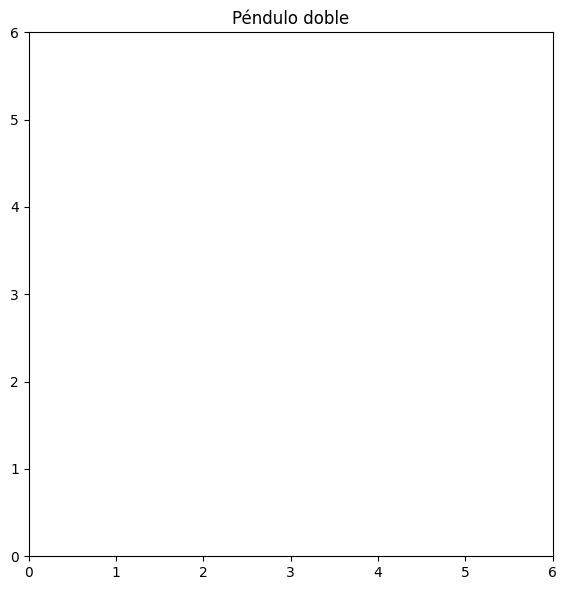

KeyboardInterrupt: 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Cargar datos de posiciones
data = np.loadtxt('c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4_intento2/posiciones/posiciones_10.0.txt')

x0, y0 = 3, 3
x1, y1 = data[:, 0], data[:, 1]
x2, y2 = data[:, 2], data[:, 3]

frames = len(data)

fig, ax1 = plt.subplots(figsize=(6, 6))

# Subgráfica del péndulo
ax1.set_xlim(0, 6)
ax1.set_ylim(0, 6)
ax1.set_aspect('equal')
ax1.set_title('Péndulo doble')
line1, = ax1.plot([], [], 'o-', lw=2, color='b')
line2, = ax1.plot([], [], 'o-', lw=2, color='r')

def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

def update(frame):
    # Animación del péndulo
    line1.set_data([x0, x1[frame]], [y0, y1[frame]])
    line2.set_data([x1[frame], x2[frame]], [y1[frame], y2[frame]])
    return line1, line2

ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=True, interval=30)

plt.tight_layout()
plt.show()
ani.save("pendulo.mp4")

# Para mostrar en Jupyter Notebook:
HTML(ani.to_jshtml())

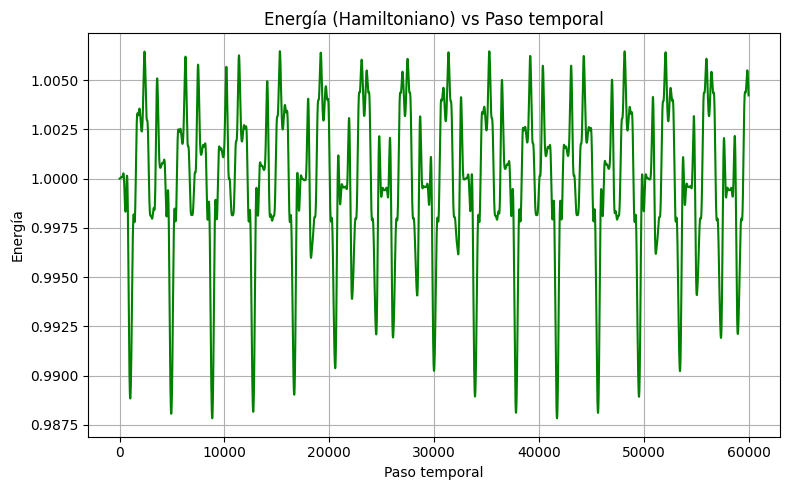

In [67]:
## PROGRAMA PLOT ENERGÍA

# Pon la energía inicial y las posiciones iniciales.

theta = np.pi / 4
pi = np.pi
E = 1.0

import numpy as np
import matplotlib.pyplot as plt

# Cargar datos de energía
hamiltoniano = np.loadtxt('c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4/hamiltoniano.txt')

plt.figure(figsize=(8, 5))
plt.plot(hamiltoniano, color='g')
plt.title('Energía (Hamiltoniano) vs Paso temporal')
plt.xlabel('Paso temporal')
plt.ylabel('Energía')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'energia_hamiltoniano_E={E}_theta={theta}_phi={phi}.png', dpi=300)
plt.show()
plt.close()

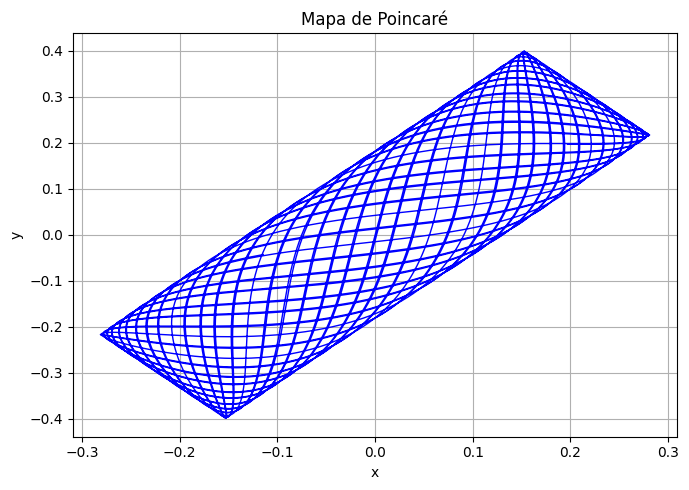

In [58]:
#### PROGRAMA MAPA DE POINCARÉ THETA Y PHI #####

import numpy as np
import matplotlib.pyplot as plt

# Cargar datos de ángulos (cada fila es (x, y))
angulos = np.loadtxt('c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4/angulos.txt')

# Separar en x e y
x = angulos[:, 0]
y = angulos[:, 1]

plt.figure(figsize=(7, 5))
plt.plot(x, y, linewidth=1, color='b')  # Línea delgada, sin marcadores
plt.title('Mapa de Poincaré')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.tight_layout()
plt.savefig('mapa_poincare.png', dpi=300)
plt.show()

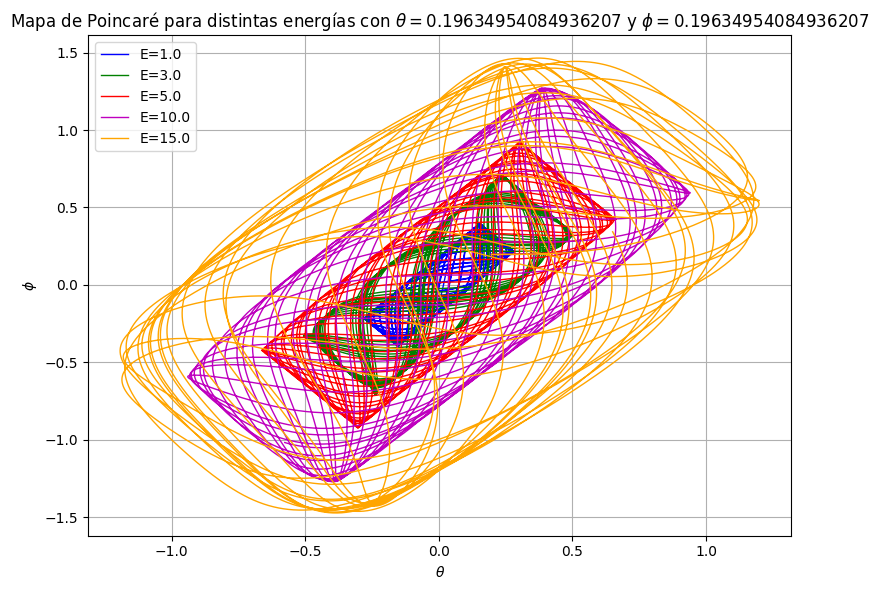

In [57]:
### PROGRAMA MAPA DE POINCARÉ PARA VARIAS ENERGÍAS ###

#PON LAS CONDICIONES INICIALES:

theta = np.pi/16
phi = np.pi/16

import numpy as np
import matplotlib.pyplot as plt

# Lista de energías usadas
energias = [1.0, 3.0, 5.0, 10.0, 15.0]
colores = ['b', 'g', 'r', 'm', 'orange']

plt.figure(figsize=(8, 6))

for E, color in zip(energias, colores):
    fname = f'angulos_{E:.1f}.txt'
    try:
        angulos = np.loadtxt(fname)
        x = angulos[:, 0]
        y = angulos[:, 1]
        plt.plot(x, y, linewidth=1, color=color, label=f'E={E}')
    except Exception as ex:
        print(f"No se pudo leer {fname}: {ex}")

plt.title(rf"Mapa de Poincaré para distintas energías con $\theta = {theta}$ y $\phi = {phi}$")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\phi$')	
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f"mapa_poincare_theta={theta}_phi={phi}.png", dpi=300)
plt.show()

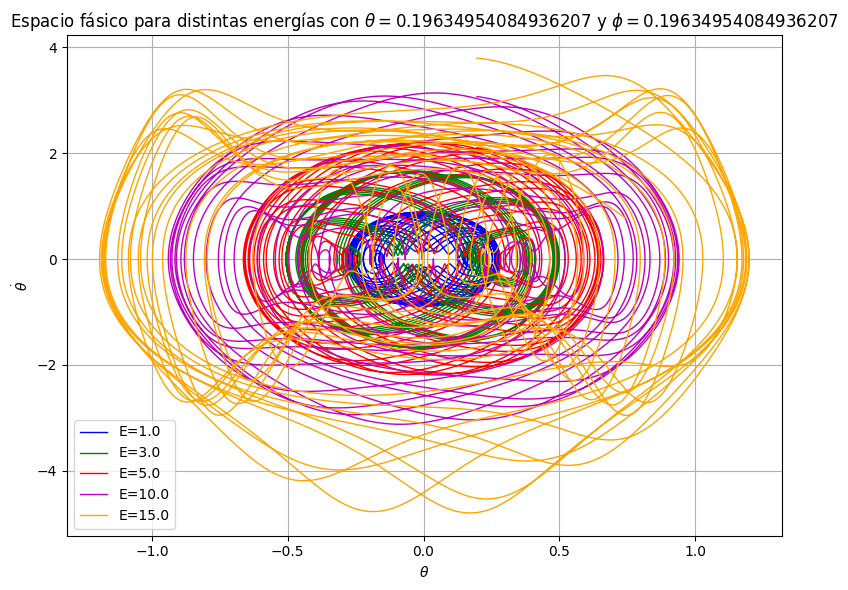

In [65]:
### PROGRAMA MAPA FÁSICO PARA THETA Y VARIAS ENERGÍAS ###

#PON LAS CONDICIONES INICIALES:

theta = np.pi/16
phi = np.pi/16

import numpy as np
import matplotlib.pyplot as plt

# Lista de energías usadas
energias = [1.0, 3.0, 5.0, 10.0, 15.0]
colores = ['b', 'g', 'r', 'm', 'orange']

plt.figure(figsize=(8, 6))

for E, color in zip(energias, colores):
    fname = f'espaciofasicotheta_{E:.1f}.txt'
    try:
        angulos = np.loadtxt(fname)
        x = angulos[:, 0]
        y = angulos[:, 1]
        plt.plot(x, y, linewidth=1, color=color, label=f'E={E}')
    except Exception as ex:
        print(f"No se pudo leer {fname}: {ex}")

plt.title(rf"Espacio fásico para distintas energías con $\theta = {theta}$ y $\phi = {phi}$")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')	
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f"espaciofasicoTHETA_theta={theta}_phi={phi}.png", dpi=300)
plt.show()

C:\Users\diego\AppData\Local\Temp\ipykernel_19116\3134177701.py:32: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\diego\AppData\Local\Temp\ipykernel_19116\3134177701.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"espaciofasicoPHI_theta={theta}_phi={phi}.png", dpi=300)


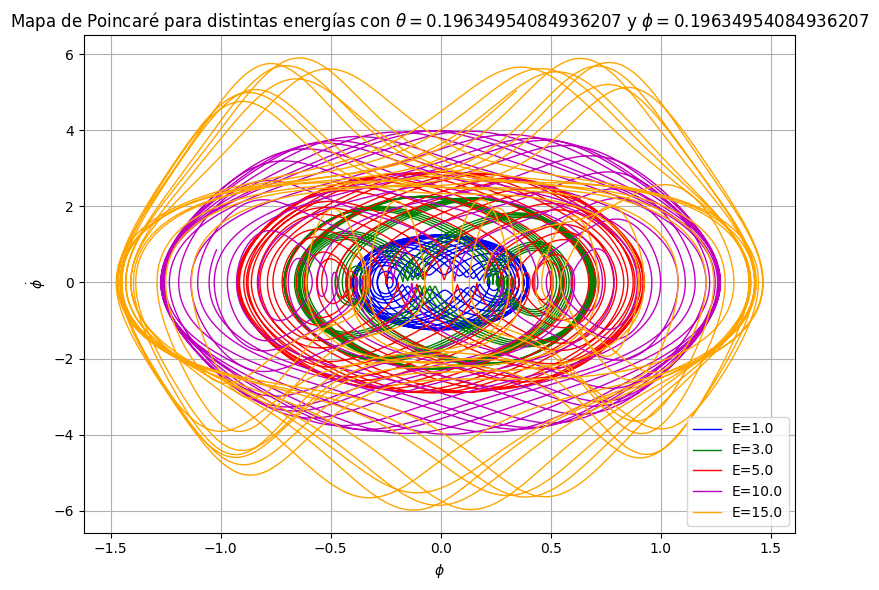

In [ ]:
### PROGRAMA MAPA FÁSICO PARA PHI Y VARIAS ENERGÍAS ###

#PON LAS CONDICIONES INICIALES:

theta = np.pi/16
phi = np.pi/16

import numpy as np
import matplotlib.pyplot as plt

# Lista de energías usadas
energias = [1.0, 3.0, 5.0, 10.0, 15.0]
colores = ['b', 'g', 'r', 'm', 'orange']

plt.figure(figsize=(8, 6))

for E, color in zip(energias, colores):
    fname = f'espaciofasicophi_{E:.1f}.txt'
    try:
        angulos = np.loadtxt(fname)
        x = angulos[:, 0]
        y = angulos[:, 1]
        plt.plot(x, y, linewidth=1, color=color, label=f'E={E}')
    except Exception as ex:
        print(f"No se pudo leer {fname}: {ex}")

plt.title(rf"Espacio fásico para distintas energías con $\theta = {theta}$ y $\phi = {phi}$")
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\dot{\phi}$')	
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f"espaciofasicoPHI_theta={theta}_phi={phi}.png", dpi=300)
plt.show()

C:\Users\diego\AppData\Local\Temp\ipykernel_19116\578173679.py:52: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


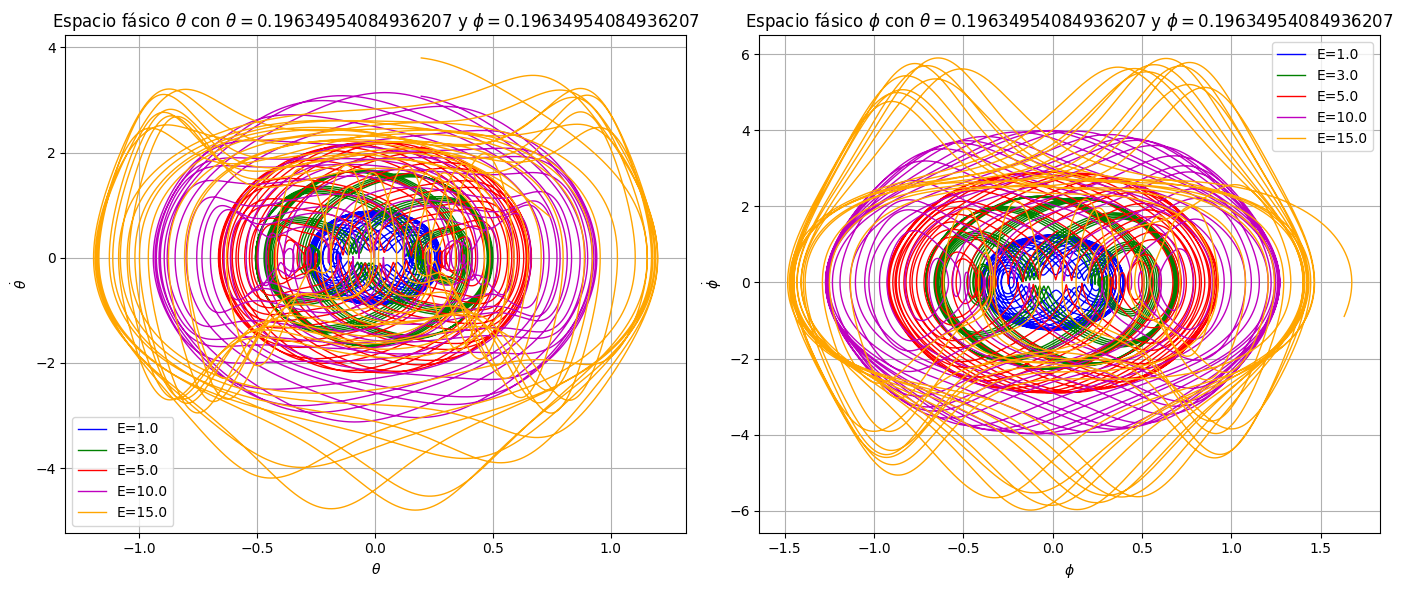

In [64]:
### PROGRAMA MAPA FÁSICO PARA THETA Y PHI Y VARIAS ENERGÍAS (SUBPLOTS) ###

# PON LAS CONDICIONES INICIALES:
theta = np.pi/16
phi = np.pi/16

import numpy as np
import matplotlib.pyplot as plt

# Lista de energías usadas
energias = [1.0, 3.0, 5.0, 10.0, 15.0]
colores = ['b', 'g', 'r', 'm', 'orange']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Subplot 1: Espacio fásico theta
for E, color in zip(energias, colores):
    fname = f'espaciofasicotheta_{E:.1f}.txt'
    try:
        datos = np.loadtxt(fname)
        x = datos[:, 0]
        y = datos[:, 1]
        ax1.plot(x, y, linewidth=1, color=color, label=f'E={E}')
    except Exception as ex:
        print(f"No se pudo leer {fname}: {ex}")

ax1.set_title(rf"Espacio fásico $\theta$ con $\theta = {theta}$ y $\phi = {phi}$")
ax1.set_xlabel(r'$\theta$')
ax1.set_ylabel(r'$\dot{\theta}$')
ax1.grid(True)
ax1.legend()
ax1.set_aspect('auto')

# Subplot 2: Espacio fásico phi
for E, color in zip(energias, colores):
    fname = f'espaciofasicophi_{E:.1f}.txt'
    try:
        datos = np.loadtxt(fname)
        x = datos[:, 0]
        y = datos[:, 1]
        ax2.plot(x, y, linewidth=1, color=color, label=f'E={E}')
    except Exception as ex:
        print(f"No se pudo leer {fname}: {ex}")

ax2.set_title(rf"Espacio fásico $\phi$ con $\theta = {theta}$ y $\phi = {phi}$")
ax2.set_xlabel(r'$\phi$')
ax2.set_ylabel(r'$\dot{\phi}$')
ax2.grid(True)
ax2.legend()
ax2.set_aspect('auto')

plt.tight_layout()
plt.savefig(f"espaciofasico_THETA_PHI_theta={theta}_phi={phi}.png", dpi=300)
plt.show()

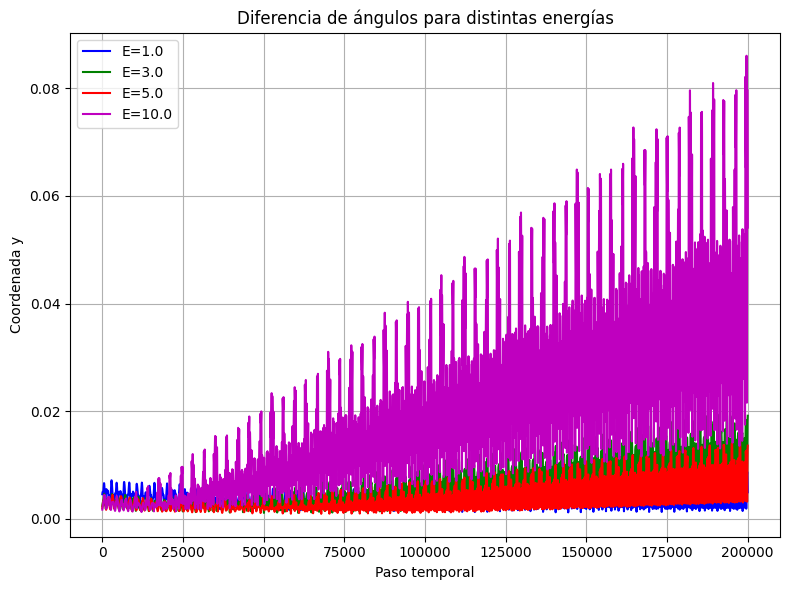

In [ ]:
### DIFERENCIAS DE ÁNGULOS ###


import numpy as np
import matplotlib.pyplot as plt

# Lista de energías que tienes guardadas
energias = [1.0, 3.0, 5.0, 10.0]  # Agrega/quita energías según tus archivos
colores = ['b', 'g', 'r', 'm', 'orange']

plt.figure(figsize=(8, 6))

for i, E in enumerate(energias):
    fname = f'c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4_intento2/lyapunov/diferenciaangulos_{E}.txt'
    try:
        datos = np.loadtxt(fname)
        pasos = np.arange(len(datos))
        color = colores[i % len(colores)]
        plt.plot(pasos, datos, color=color, label=f'E={E}')
    except Exception as ex:
        print(f"No se pudo leer {fname}: {ex}")

plt.title('Diferencia de ángulos para distintas energías')
plt.xlabel('Paso temporal')
plt.ylabel('Coordenada y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4/lyapunov/diferenciaangulos_todas_energias.png', dpi=300)
plt.show()


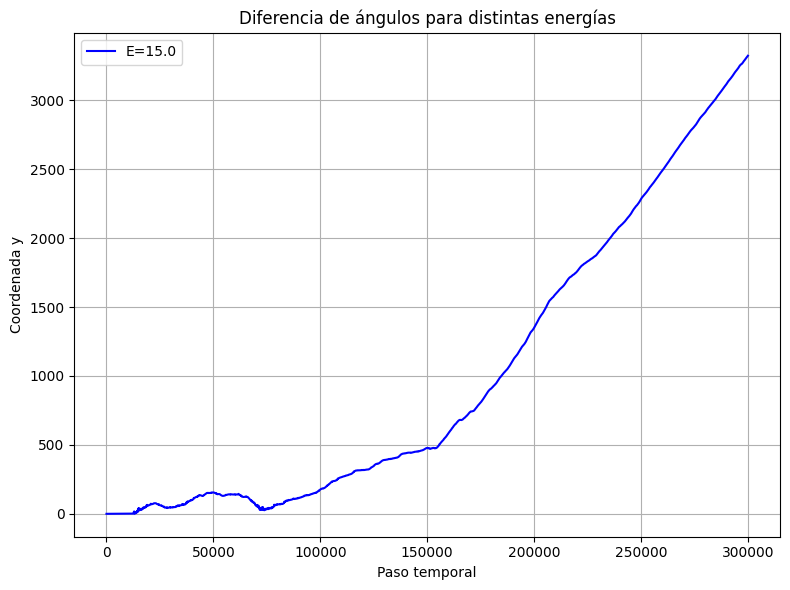

In [116]:
### DIFERENCIAS DE ÁNGULOS PARA ENERGIA 15###


import numpy as np
import matplotlib.pyplot as plt

# Lista de energías que tienes guardadas
energias = [15.0]  # Agrega/quita energías según tus archivos
colores = ['b', 'g', 'r', 'm', 'orange']

plt.figure(figsize=(8, 6))

for i, E in enumerate(energias):
    fname = f'c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4/lyapunov/diferenciaangulos_{E}.txt'
    try:
        datos = np.loadtxt(fname)
        pasos = np.arange(len(datos))
        color = colores[i % len(colores)]
        plt.plot(pasos, datos, color=color, label=f'E={E}')
    except Exception as ex:
        print(f"No se pudo leer {fname}: {ex}")

plt.title('Diferencia de ángulos para distintas energías')
plt.xlabel('Paso temporal')
plt.ylabel('Coordenada y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4/lyapunov/diferenciaangulos_todas_energias.png', dpi=300)
plt.show()

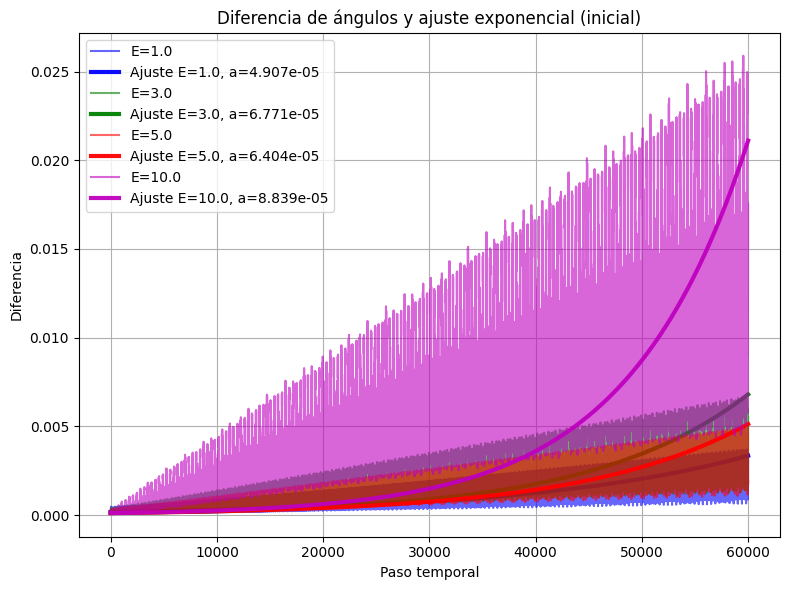

In [152]:
#### DIFERENCIA DE ANGULOS Y AJUSTE #####

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

energias = [1.0, 3.0, 5.0, 10.0]
colores = ['b', 'g', 'r', 'm', 'orange']

def exp_func(x, a):
    return y0 * np.exp(a * x)

plt.figure(figsize=(8, 6))

for i, E in enumerate(energias):
    fname = f'c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4/lyapunov/diferenciaangulos_{E}.txt'
    try:
        datos = np.loadtxt(fname)
        pasos = np.arange(len(datos))
        color = colores[i % len(colores)]
        # Datos originales: más transparentes
        plt.plot(pasos, datos, color=color, label=f'E={E}', alpha=0.6, linewidth=1.5)
        
        # Ajuste solo en la parte inicial y solo si hay suficientes datos positivos
        datos_fit = datos
        pasos_fit = pasos
        y0 = datos_fit[0]
        if np.all(datos_fit > 0):
            try:
                popt, _ = curve_fit(lambda x, a: exp_func(x, a), pasos_fit, datos_fit, p0=[0.001], maxfev=5000)
                ajuste = exp_func(pasos_fit, popt[0])
                # Ajuste: muy opaco y más grueso
                plt.plot(pasos_fit, ajuste, color=color, alpha=0.95, linewidth=3, label=f'Ajuste E={E}, a={popt[0]:.3e}')
            except Exception as ajuste_ex:
                print(f"No se pudo ajustar {fname}: {ajuste_ex}")
        else:
            print(f"Datos no positivos o insuficientes para ajuste en {fname}")
    except Exception as ex:
        print(f"No se pudo leer {fname}: {ex}")

plt.title('Diferencia de ángulos y ajuste exponencial (inicial)')
plt.xlabel('Paso temporal')
plt.ylabel('Diferencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4/lyapunov/diferenciaangulos_ajuste.png', dpi=300)
plt.show()

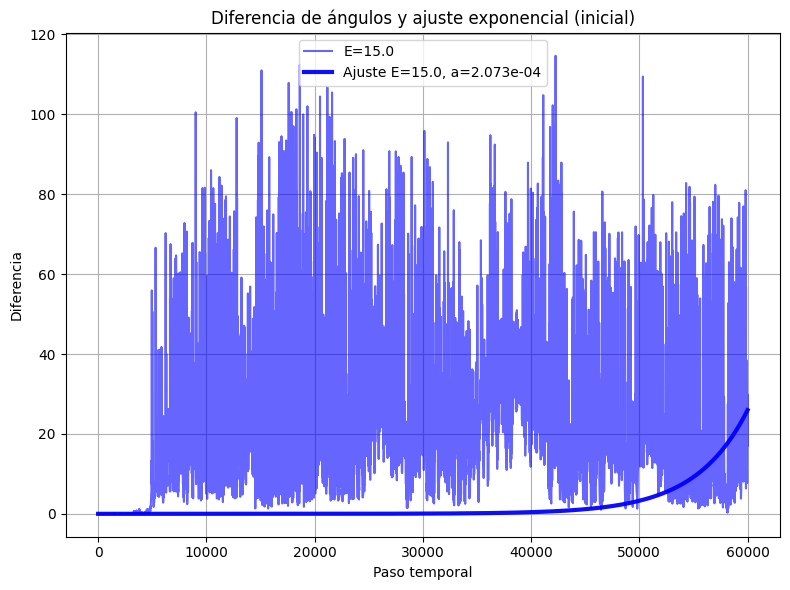

In [153]:
#### DIFERENCIA DE ANGULOS Y AJUSTE E=15 ####

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

energias = [15.0]
colores = ['b', 'g', 'r', 'm', 'orange']

def exp_func(x, a):
    return y0 * np.exp(a * x)

plt.figure(figsize=(8, 6))

for i, E in enumerate(energias):
    fname = f'c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4/lyapunov/diferenciaangulos_{E}.txt'
    try:
        datos = np.loadtxt(fname)
        pasos = np.arange(len(datos))
        color = colores[i % len(colores)]
        # Datos originales: más transparentes
        plt.plot(pasos, datos, color=color, label=f'E={E}', alpha=0.6, linewidth=1.5)
        
        # Ajuste solo en la parte inicial y solo si hay suficientes datos positivos
        datos_fit = datos
        pasos_fit = pasos
        y0 = datos_fit[0]
        if np.all(datos_fit > 0):
            try:
                popt, _ = curve_fit(lambda x, a: exp_func(x, a), pasos_fit, datos_fit, p0=[0.001], maxfev=5000)
                ajuste = exp_func(pasos_fit, popt[0])
                # Ajuste: muy opaco y más grueso
                plt.plot(pasos_fit, ajuste, color=color, alpha=0.95, linewidth=3, label=f'Ajuste E={E}, a={popt[0]:.3e}')
            except Exception as ajuste_ex:
                print(f"No se pudo ajustar {fname}: {ajuste_ex}")
        else:
            print(f"Datos no positivos o insuficientes para ajuste en {fname}")
    except Exception as ex:
        print(f"No se pudo leer {fname}: {ex}")

plt.title('Diferencia de ángulos y ajuste exponencial (inicial)')
plt.xlabel('Paso temporal')
plt.ylabel('Diferencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4/lyapunov/diferenciaangulos_ajuste.png', dpi=300)
plt.show()

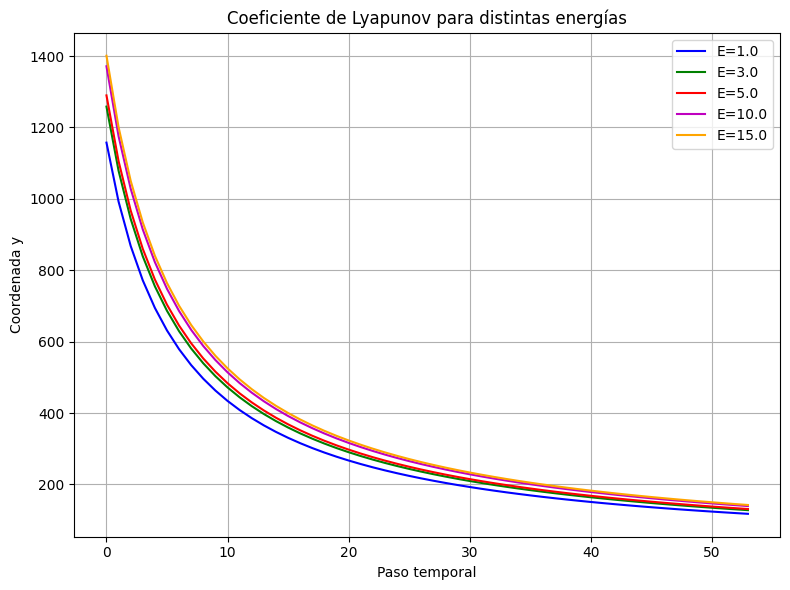

In [6]:
### COEFICIENTE DE LYAPUNOV ###


import numpy as np
import matplotlib.pyplot as plt

# Lista de energías que tienes guardadas
energias = [1.0, 3.0, 5.0, 10.0, 15.0]  # Agrega/quita energías según tus archivos
colores = ['b', 'g', 'r', 'm', 'orange']

plt.figure(figsize=(8, 6))

for i, E in enumerate(energias):
    fname = f'c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4_intento2/lyapunov/lyapunovcoefi/lyapunov_{E}.txt'
    try:
        datos = np.loadtxt(fname)
        pasos = np.arange(len(datos))
        color = colores[i % len(colores)]
        plt.plot(pasos, datos, color=color, label=f'E={E}')
    except Exception as ex:
        print(f"No se pudo leer {fname}: {ex}")

plt.title('Coeficiente de Lyapunov para distintas energías')
plt.xlabel('Paso temporal')
plt.ylabel('Coordenada y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4_intento2/lyapunov/coeficiente_lyapunov_energias.png', dpi=300)
plt.show()


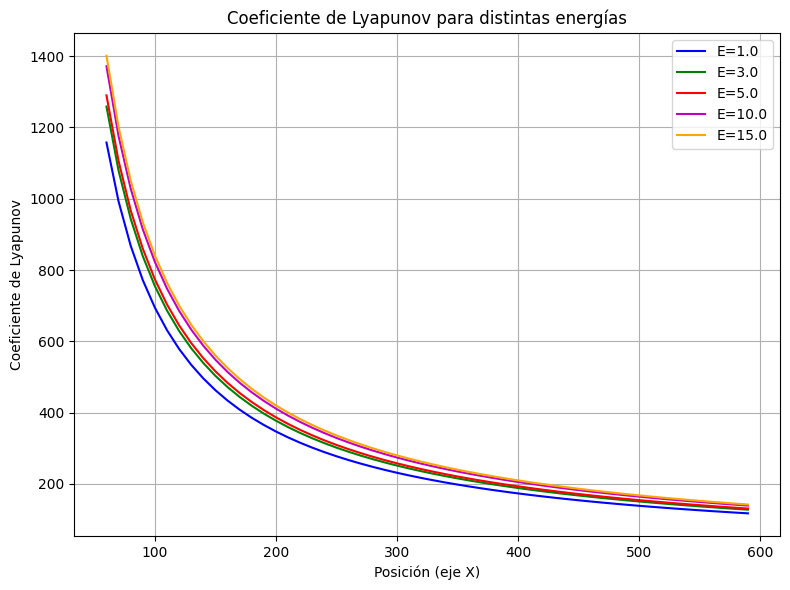

In [8]:
#LYAPUNOV BIEN?

import numpy as np
import matplotlib.pyplot as plt

# Lista de energías que tienes guardadas
energias = [1.0, 3.0, 5.0, 10.0, 15.0]  # Modifica según tus archivos
colores = ['b', 'g', 'r', 'm', 'orange']

plt.figure(figsize=(8, 6))

for i, E in enumerate(energias):
    fname = f'c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4_intento2/lyapunov/lyapunovcoefi/lyapunov_{E}.txt'
    try:
        datos = np.loadtxt(fname)
        # Si el archivo tiene dos columnas: columna 0 = X, columna 1 = Lyapunov
        x = datos[:, 1]
        y = datos[:, 0]
        color = colores[i % len(colores)]
        plt.plot(x, y, color=color, label=f'E={E}')
    except Exception as ex:
        print(f"No se pudo leer {fname}: {ex}")

plt.title('Coeficiente de Lyapunov para distintas energías')
plt.xlabel('Posición (eje X)')
plt.ylabel('Coeficiente de Lyapunov')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario_4_intento2/lyapunov/coeficiente_lyapunov_energias_vs_x.png', dpi=300)
plt.show()